In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

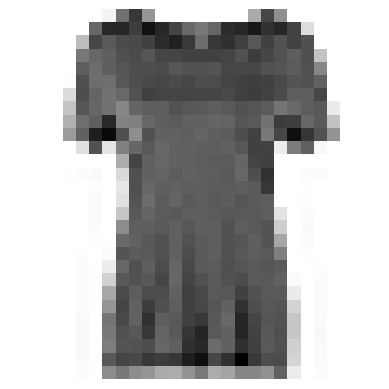

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accuracy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of ten fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Task-1

## Load and preprocess dataset

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten for classical ML models
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

print("Train shape:", X_train_flat.shape)
print("Test shape:", X_test_flat.shape)

Train shape: (60000, 784)
Test shape: (10000, 784)


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)
y_pred_lr = log_reg.predict(X_test_flat)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=class_names))


=== Logistic Regression ===
Accuracy: 0.8444
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.80      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.85      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Support Vector Machine

In [10]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=2000)
svm.fit(X_train_flat[:10000], y_train[:10000])  # smaller subset (SVM is slow)
y_pred_svm = svm.predict(X_test_flat[:2000])

print("\n=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test[:2000], y_pred_svm))
print(classification_report(y_test[:2000], y_pred_svm, target_names=class_names))


=== Support Vector Machine ===
Accuracy: 0.818
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.75      0.77       200
     Trouser       0.93      0.95      0.94       203
    Pullover       0.72      0.74      0.73       214
       Dress       0.79      0.77      0.78       190
        Coat       0.73      0.73      0.73       219
      Sandal       0.93      0.91      0.92       195
       Shirt       0.58      0.58      0.58       197
     Sneaker       0.88      0.91      0.89       200
         Bag       0.90      0.91      0.91       194
  Ankle boot       0.95      0.95      0.95       188

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat[:20000], y_train[:20000])  # use subset for faster training
y_pred_rf = rf.predict(X_test_flat)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=class_names))


=== Random Forest ===
Accuracy: 0.8621
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.74      0.79      0.76      1000
       Dress       0.86      0.90      0.88      1000
        Coat       0.75      0.80      0.77      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.69      0.58      0.63      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat[:5000], y_train[:5000])   # train on smaller subset
y_pred_knn = knn.predict(X_test_flat[:1000])   # test on subset

print("\n=== k-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test[:1000], y_pred_knn))
print(classification_report(y_test[:1000], y_pred_knn, target_names=class_names))


=== k-Nearest Neighbors ===
Accuracy: 0.807
              precision    recall  f1-score   support

 T-shirt/top       0.73      0.82      0.78       107
     Trouser       0.95      0.96      0.96       105
    Pullover       0.69      0.74      0.71       111
       Dress       0.84      0.77      0.80        93
        Coat       0.73      0.72      0.72       115
      Sandal       0.97      0.76      0.85        87
       Shirt       0.58      0.54      0.56        97
     Sneaker       0.83      0.91      0.87        95
         Bag       0.99      0.93      0.96        95
  Ankle boot       0.84      0.94      0.89        95

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



## CNN

In [13]:
from tensorflow.keras import models, layers

# Reshape for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Define CNN
cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN
history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Evaluate CNN
test_loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"\n=== Convolutional Neural Network ===")
print(f"Accuracy: {test_acc_cnn:.4f}")

Epoch 1/20
422/422 - 76s - 179ms/step - accuracy: 0.7483 - loss: 0.6761 - val_accuracy: 0.8492 - val_loss: 0.4047
Epoch 2/20
422/422 - 66s - 156ms/step - accuracy: 0.8484 - loss: 0.4127 - val_accuracy: 0.8773 - val_loss: 0.3291
Epoch 3/20
422/422 - 29s - 68ms/step - accuracy: 0.8742 - loss: 0.3472 - val_accuracy: 0.8892 - val_loss: 0.2860
Epoch 4/20
422/422 - 53s - 126ms/step - accuracy: 0.8844 - loss: 0.3162 - val_accuracy: 0.9027 - val_loss: 0.2679
Epoch 5/20
422/422 - 66s - 157ms/step - accuracy: 0.8927 - loss: 0.2927 - val_accuracy: 0.9050 - val_loss: 0.2572
Epoch 6/20
422/422 - 75s - 178ms/step - accuracy: 0.8986 - loss: 0.2770 - val_accuracy: 0.9082 - val_loss: 0.2483
Epoch 7/20
422/422 - 40s - 96ms/step - accuracy: 0.9021 - loss: 0.2629 - val_accuracy: 0.9155 - val_loss: 0.2301
Epoch 8/20
422/422 - 21s - 51ms/step - accuracy: 0.9089 - loss: 0.2503 - val_accuracy: 0.9158 - val_loss: 0.2219
Epoch 9/20
422/422 - 22s - 53ms/step - accuracy: 0.9106 - loss: 0.2418 - val_accuracy: 0.91

## AUC Visualisation and Summary

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


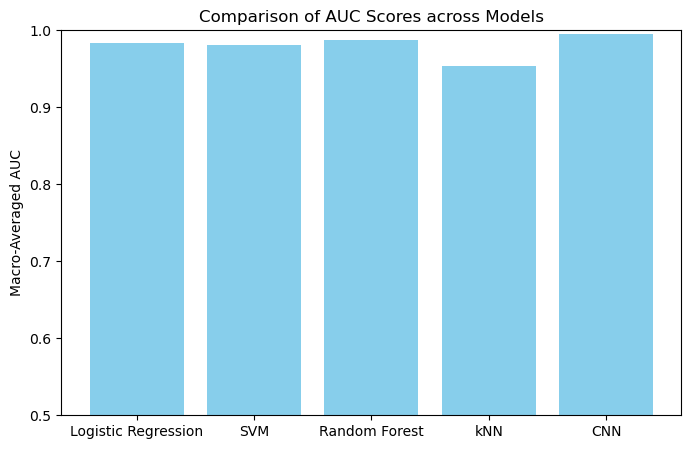

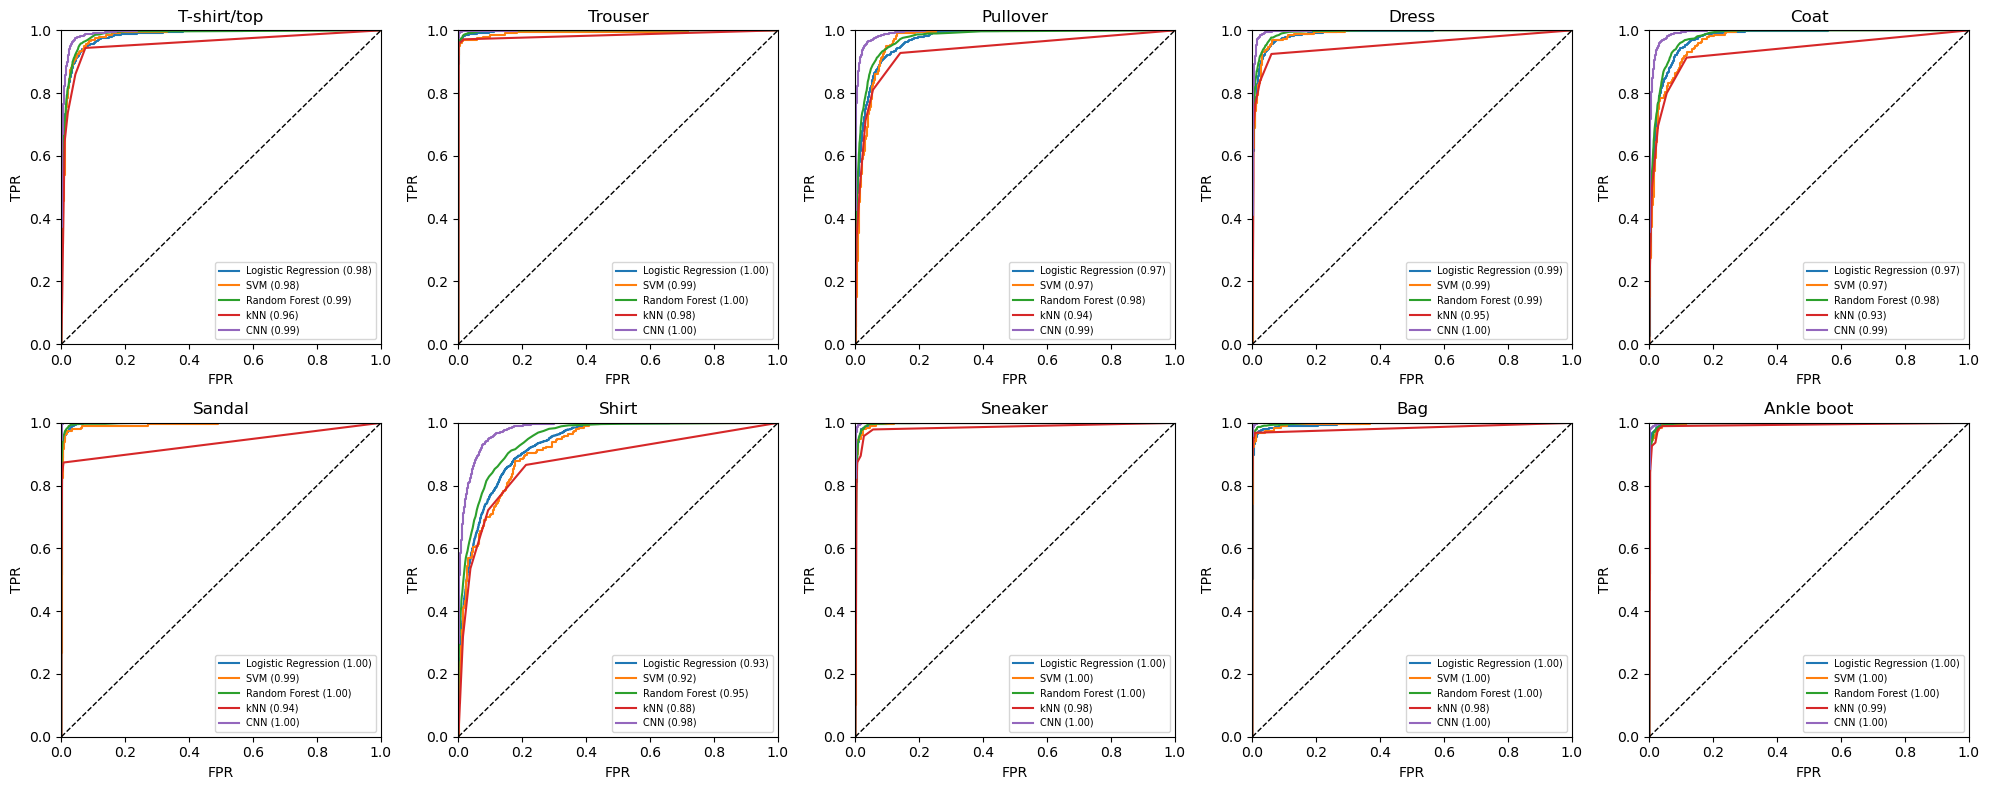


=== Model Comparison (Accuracy) ===
Logistic Regression: 0.8444
SVM: 0.8180
Random Forest: 0.8621
kNN: 0.8070
CNN: 0.9219


In [14]:
# --- Preprocess X_test for CNN ---
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# Dictionary to store model names and predicted probabilities
model_probs = {}

# Logistic Regression
y_pred_prob_lr = log_reg.predict_proba(X_test_flat)
model_probs["Logistic Regression"] = y_pred_prob_lr

# SVM (trained with probability=True)
from sklearn.svm import SVC
svm_prob = SVC(kernel="linear", probability=True, max_iter=2000)
svm_prob.fit(X_train_flat[:5000], y_train[:5000])  # subset for speed
y_pred_prob_svm = svm_prob.predict_proba(X_test_flat[:2000])
model_probs["SVM"] = y_pred_prob_svm

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test_flat)
model_probs["Random Forest"] = y_pred_prob_rf

# kNN
y_pred_prob_knn = knn.predict_proba(X_test_flat[:1000])
model_probs["kNN"] = y_pred_prob_knn

# CNN (make sure you trained cnn_model, not overwritten as "model")
y_pred_prob_cnn = cnn_model.predict(X_test_cnn, verbose=0)
model_probs["CNN"] = y_pred_prob_cnn

# --- Compute AUC for each model ---
auc_scores = {}
for name, probs in model_probs.items():
    if name == "SVM":  # trained on subset
        auc_scores[name] = roc_auc_score(y_test_bin[:2000], probs, average="macro", multi_class="ovr")
    elif name == "kNN":
        auc_scores[name] = roc_auc_score(y_test_bin[:1000], probs, average="macro", multi_class="ovr")
    else:
        auc_scores[name] = roc_auc_score(y_test_bin, probs, average="macro", multi_class="ovr")

# --- Visualization 1: Bar Chart of Macro AUC ---
plt.figure(figsize=(8,5))
plt.bar(auc_scores.keys(), auc_scores.values(), color='skyblue')
plt.ylabel("Macro-Averaged AUC")
plt.title("Comparison of AUC Scores across Models")
plt.ylim(0.5, 1.0)
plt.show()

# --- Visualization 2: ROC Curves for All Classes ---
n_classes = 10
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 cols = 10 subplots

for class_idx in range(n_classes):
    ax = axes[class_idx // 5, class_idx % 5]

    for name, probs in model_probs.items():
        # Adjust for subset-trained models
        if name == "SVM":
            fpr, tpr, _ = roc_curve(y_test_bin[:2000, class_idx], probs[:, class_idx])
        elif name == "kNN":
            fpr, tpr, _ = roc_curve(y_test_bin[:1000, class_idx], probs[:, class_idx])
        else:
            fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], probs[:, class_idx])

        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=1.5, label=f"{name} ({roc_auc:.2f})")

    ax.plot([0,1],[0,1],'k--', lw=1)  # baseline
    ax.set_title(class_names[class_idx])
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.legend(fontsize=7)

plt.tight_layout()
plt.show()

# --- Results Dictionary with CNN ---
test_loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)

results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test[:2000], y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "kNN": accuracy_score(y_test[:1000], y_pred_knn),
    "CNN": test_acc_cnn
}

print("\n=== Model Comparison (Accuracy) ===")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


# Task-2

## Import necessary libraries

In [24]:
!pip install opencv-python
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/12.6 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.6 MB 3.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.6 MB 3.6 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.6 MB 3.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.6 MB 3.4 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.6 MB 3.3 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.6 MB 3.4 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.6 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 3.4 MB/s eta 0:00:02
   ------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


## Load images

In [27]:
# Path to test fashion images
img_dir = "sample_fashion_images"  # folder with 10 images
img_files = sorted(os.listdir(img_dir))[:10]

my_images = []
for file in img_files:
    path = os.path.join(img_dir, file)

    # Load image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Skipping {file} (could not be read as image)")
        continue

    # Resize to 28x28
    img_resized = cv2.resize(img, (28,28))

    # Normalize
    img_norm = img_resized.astype("float32") / 255.0

    my_images.append(img_norm)

my_images = np.array(my_images)
print("Final shape:", my_images.shape)


Final shape: (10, 28, 28)


## Visualize all images side by side

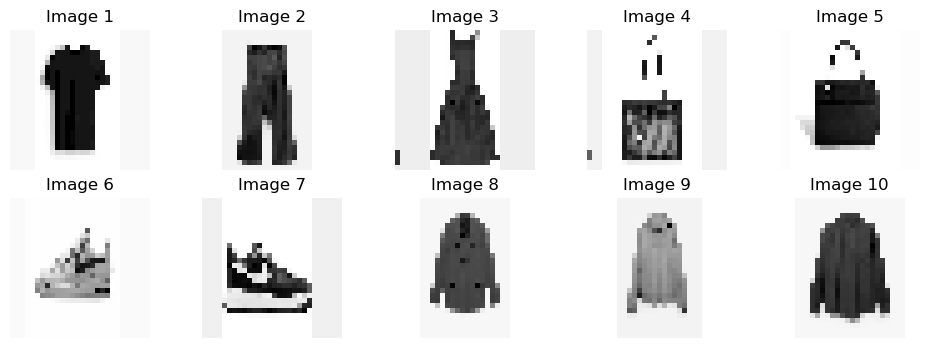

In [28]:
plt.figure(figsize=(12,4))
for i in range(len(my_images)):
    plt.subplot(2,5,i+1)
    plt.imshow(my_images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Image {i+1}")
plt.show()

## Predict using best model (Neural Net)

In [29]:
# Add channel dimension
my_images_cnn = my_images.reshape(-1, 28, 28, 1)

# Predict
predictions = cnn_model.predict(my_images_cnn, verbose=0)
pred_labels = np.argmax(predictions, axis=1)

print("Predicted Labels:")
for i, pred in enumerate(pred_labels):
    print(f"Image {i+1}: {class_names[pred]}")


Predicted Labels:
Image 1: Shirt
Image 2: Pullover
Image 3: Pullover
Image 4: Pullover
Image 5: Pullover
Image 6: Pullover
Image 7: Bag
Image 8: Shirt
Image 9: Bag
Image 10: Shirt


In [31]:
cnn_model.save("cnn_fashion_model.h5")